In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

In [2]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)
%config InlineBackend.figure_format='jpeg'

c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


Generate random numbers sampling several Cauchy distributions

In [27]:
random_state = np.random.RandomState(seed=0)
N           = 2000
mu_gamma_f  = [(5, 1.0, 0.1),
               (7, 0.5, 0.5),
               (9, 0.1, 0.1),
               (12, 0.5, 0.2),
               (14, 1.0, 0.1)            
               ] 

#Se non ho capito male questa dovrebbe creare i propotipi delle pdf per diversi valori di mu, gamma, f
hx = lambda x : sum([f * stats.cauchy(mu, gamma).pdf(x) for (mu, gamma, f) in mu_gamma_f])
#Questo invece va a campionare effettivamente le pdf ed estrae f*N numeri tramite un algoritmo che dipende da "random state"
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state) for (mu, gamma, f) in mu_gamma_f])
#Questo mishcia il contenunto dell'array x
random_state.shuffle(x)

x = x[x > -10]
x = x[x < 30]

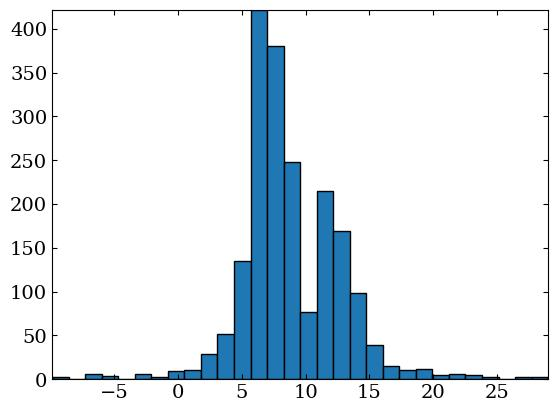

In [28]:
plt.hist(x, bins=30);

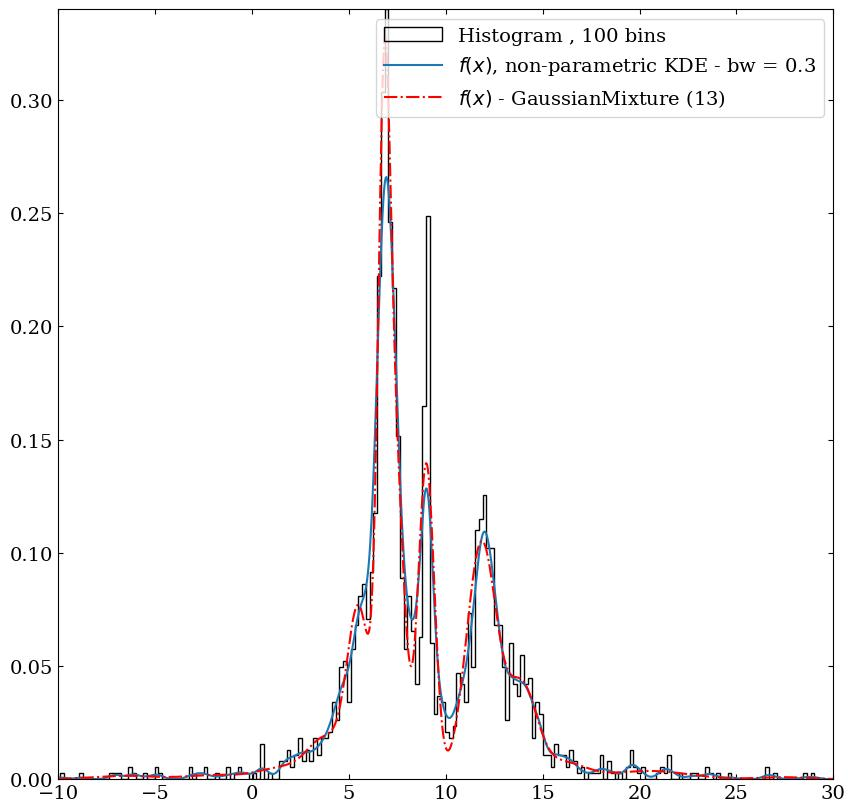

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
xgrid    = np.linspace(-10, 30, 1000)

ax.hist(x, density=True, color='black', bins=200, histtype='step', lw=2, label='Histogram , 100 bins', linewidth=1)


if False:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3, label='$h(x)$, Generating Distribution')
    
if True:
    #for bw in np.arange(0.08,0.5,0.1):
        bw = 0.3 
        kde = KernelDensity(bandwidth=bw, kernel='gaussian')
        kde.fit(x[:, None])
        dens_kde = np.exp(kde.score_samples(xgrid[:,None]))
        ax.plot(xgrid, dens_kde, '-' , label=f"$f(x)$, non-parametric KDE - bw = {bw:.2}")
    
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1,1))
    logprob = gmm.score_samples(xgrid.reshape(-1,1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1,1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-.', color='red', label='$f(x)$ - GaussianMixture (13)')
    
    ax.legend()


In [47]:
np.arange(0,0.4,0.1)

array([0. , 0.1, 0.2, 0.3])